# Demystifying Entropy in ML 👨‍💻 

> In this post, I summarize my understing of what is entropy means in Machine Learning using some code examples. This post is inspired from the awesome [video](https://www.youtube.com/watch?v=YtebGVx-Fxw) from [Statquest](https://twitter.com/joshuastarmer).  

- toc: true 
- badges: true
- comments: true
- categories: [Machine Learning, Python]
- hide: false
- image: images/dcgan.png

Entropy is used for a lot of purposes in Data Science.
* It can be used to build classiification trees.
* It is the basis for Mutual Information which quantified the relation between two things.
* It is the basis of Relative Entropy(aka the Kullback-Leibler Distance) and Cross Entropy.

All of the above use entropy or something derived from it to quantify similarities and differences. Let's learn how entropy quantifies similarities and differences

## Utility Code

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [7]:
# Code to plot a function.
def plot_func(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = np.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

## Introduction to Surprise 😲: Bags, Apples & Oranges 💼 🍎 🍊 

Let's say we have three bags 💼  that are red, green, and blue in color. All these bags contain Apples 🍎  and Oranges 🍊 in different quantities. The task at hand is to quantify how similar or different these bags are from each other in terms of their composition using `Entropy` as a metric. 

Since the number of apples in the red bag  is more, the probability of picking up an apples  from the red bag is higher. Hence it would not be very surprising, if we picked up an apples from the red bag. In contrast, if we picked up an orange from the red bag, we would be relatively surprised.

In [8]:
red_bag = np.array(['Apple']*4 + ['Orange']); print(f'Red Bag conatins: {Counter(red_bag)}') 
green_bag = np.array(['Orange']*9 + ['Apple']); print(f'Green Bag conatins: {Counter(green_bag)}')
white_bag = np.array(['Orange']*5 + ['Apple']*5); print(f'White Bag conatins: {Counter(white_bag)}')

Red Bag conatins: Counter({'Apple': 4, 'Orange': 1})
Green Bag conatins: Counter({'Orange': 9, 'Apple': 1})
White Bag conatins: Counter({'Orange': 5, 'Apple': 5})


In [9]:
# Define the probability of observing Appless & Oranges in red bag.
red_ctr = Counter(red_bag)

P_apple_red = red_ctr['Apple'] / len(red_bag)
print(f'P(Apple from Red Bag) : {round(P_apple_red,2)}')

P_orange_red = red_ctr['Orange'] / len(red_bag)
print(f'P(Orange from Red Bag): {round(P_orange_red,2)}')

P(Apple from Red Bag) : 0.8
P(Orange from Red Bag): 0.2


The green bag has a lot more oranges than apples. Hence we would not be very surprised if we picked up an orange from this bag. On the other hand, if we picked up a apple, that would be relatively surprising.

In [10]:
# Define the probability of observing Appless & Oranges in green bag.
green_ctr = Counter(green_bag)

P_apple_green = green_ctr['Apple'] / len(green_bag)
print(f'P(Apple from Green Bag) : {round(P_apple_green,2)}')

P_orange_green = green_ctr['Orange'] / len(green_bag)
print(f'P(Orange from Green Bag): {round(P_orange_green,2)}')

P(Apple from Green Bag) : 0.1
P(Orange from Green Bag): 0.9


Since, the white bag has equal number of apples and oranges, we would be equally surprised, irrespective of whether we pick up and apple or orange.

In [11]:
# Define the probability of observing Appless & Oranges in white bag.
white_ctr = Counter(white_bag)

P_apple_white = white_ctr['Apple'] / len(white_bag)
print(f'P(Apple from White Bag) : {round(P_apple_white,2)}')

P_orange_white = white_ctr['Orange'] / len(white_bag)
print(f'P(Orange from White Bag): {round(P_orange_white,2)}')

P(Apple from White Bag) : 0.5
P(Orange from White Bag): 0.5


Looking at the above examples, we can observe the relationship between surprise and probability.
* When the probability of picking an apple from the red bag is high, the surprise is low.
* When the probability of picking an apple fronm the green bag is low, the surprise is high. 

Hence we can conclude the Surprise is inversely related to probability of an event.

## Defining Surprise Mathematically 🧮 

In order to talk about entropy, first we will have to understand surprise. 

In [12]:
# Function to calculate surprise
def surprise(probability): return np.round(np.log2(1/probability),2)

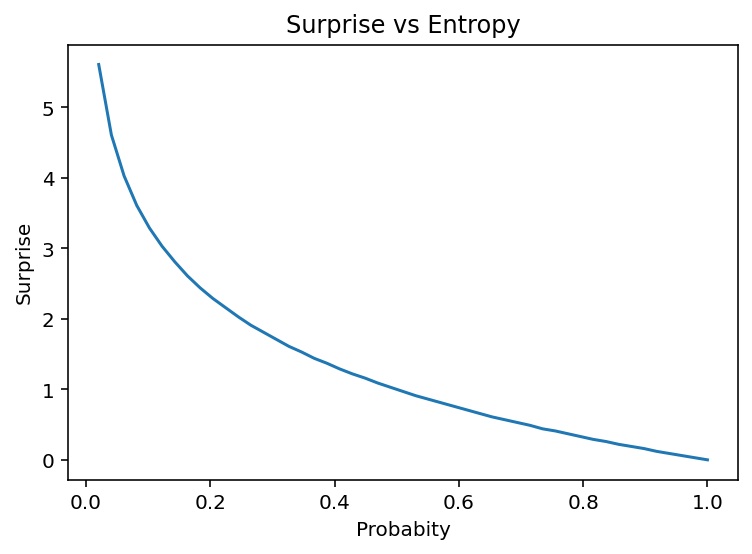

In [13]:
plot_func(surprise, tx='Probabity', ty='Surprise', title='Surprise vs Entropy', min=0, max=1)

Let's assume that we have a biased coin with $P(H)$ = 0.9 and $P(T)$ = 0.1. We can calculate the surprise of heads and tails as follows

In [14]:
P_h = 0.9
P_t = 0.1

In [15]:
S_h = surprise(P_h); S_h

0.15

In [16]:
S_t = surprise(P_t); S_t

3.32

## Calculating surprise for a series of events 

Let's calculate the surprise of getting 2 heads and 1 tail. It turns out that it is same adding the surprise of 2 heads and 1 tail as seen in the snippets below.

In [17]:
surprise(P_h * P_h * P_t)

3.63

In [18]:
S_h + S_h + S_t

3.6199999999999997

In [19]:
surprise(P_h * P_h * P_t) == S_h + S_h + S_t

False

## Entropy as the expected value of surprise 

 $Entropy$ = $\sum$ $\frac{1}{log(p(x))}$  $\ast$  $p(x)$

In [29]:
table = pd.DataFrame({'Heads': [.15, .9], 'Tails': [3.32, .1]}, index=['Surprise','Probability']); table

,Heads,Tails
Surprise,0.15,3.32
Probability,0.90,0.10


In [34]:
# Entropy is the average surprise per iteration of the process
Entropy =  table.loc['Probability', 'Heads'] * table.loc['Surprise', 'Heads'] +  table.loc['Probability', 'Tails'] * table.loc['Surprise', 'Heads']
Entropy

0.15000000000000002

From the above equation, it can be observed that the Entropy can also be represented as the dot product of the probability of observing certain events and their associated surprise.

In [ ]:
P_e = np.array([.9, .1])
S_e = np.array([.15, 3.32])

In [ ]:
Entropy = np.dot(P_e, S_e)
Entropy

## Entropy in Action 🎬

In [23]:
def entropy(arr):
  ent = 0
  probs = dict()
  ctr = Counter(arr)
  for e in ctr:
    probs[f'P_{e}'] = ctr[e] / len(arr)
  for p in probs:
    ent += -1 * probs[p] * np.log2(probs[p])
  return round(ent, 2)  

In [24]:
def show_entropy(bag_type=None, bag_type_str=None):
  ctr = Counter(bag_type)
  print(f"{bag_type_str} conatins: {Counter(bag_type)}")
  print(f"P(Apple from {bag_type_str}) : { ctr['Apple'] / len(bag_type)}")
  print(f"P(Orange from {bag_type_str}): {ctr['Orange'] / len(bag_type)}")
  print(f"Entropy of the {bag_type_str} is: {entropy(bag_type)}")

The entropy for the red bag turns out to be 0.72. It is closer to the probability of picking an apple from the red bag because there are more apples in the red bag as compared to oranges.

In [25]:
show_entropy(bag_type = red_bag, bag_type_str='Red Bag')

Red Bag conatins: Counter({'Apple': 4, 'Orange': 1})
P(Apple from Red Bag) : 0.8
P(Orange from Red Bag): 0.2
Entropy of the Red Bag is: 0.72


In [26]:
show_entropy(bag_type = green_bag, bag_type_str='Green Bag')

Green Bag conatins: Counter({'Orange': 9, 'Apple': 1})
P(Apple from Green Bag) : 0.1
P(Orange from Green Bag): 0.9
Entropy of the Green Bag is: 0.47


In [27]:
show_entropy(bag_type = white_bag, bag_type_str='White Bag')

White Bag conatins: Counter({'Orange': 5, 'Apple': 5})
P(Apple from White Bag) : 0.5
P(Orange from White Bag): 0.5
Entropy of the White Bag is: 1.0


## Summary

We use entropy to quantify the similarity or difference between two groups composed of a certain types of objects.Entropy of a group is highest when we have the same number of objects belonging to different classes in that group and it decreases as the difference between the objects of different classes increases.